## Imports

In [1]:
import sys
import os
from pathlib import Path

# Caminho base do projeto a partir do diretório de trabalho atual
base_dir = Path(os.getcwd()).resolve().parent  # Ajuste se necessário

# Adicionar a pasta 'visualization' ao sys.path de forma relativa
visualization_dir = base_dir / 'src' / 'visualization'
split_dir = base_dir / 'src' / 'data'
utils_dir = base_dir / 'src' / 'utils'
sys.path.append(str(visualization_dir))
sys.path.append(str(split_dir))
sys.path.append(str(utils_dir))

# Importar o módulo Visualization
try:
    import Visualization
    import SplitImagesToModel
    import RenameFolder
except ImportError:
    print("Erro: Não foi possível importar o módulo 'Visualization'. Verifique se o caminho está correto.")

## Contagem das imagens de cada classe

### 1.Desequilibrio das Classes

In [2]:
image_dir = base_dir / 'data' / 'raw'

pastas_para_analisar = [
    image_dir / 'Calculus',
    image_dir / 'Tooth Discoloration' / 'Tooth_Discoloration',
    image_dir / 'Mouth Ulcer' / 'Mouth_Ulcer',
    image_dir / 'Hypodontia',
    image_dir / 'Gingivitis',
    image_dir / 'Caries' / 'Caries',
]

In [3]:
contagem_de_imagens = Visualization.contar_imagens_em_pastas(pastas_para_analisar)
contagem_de_imagens

{'Calculus': 1296,
 'Tooth_Discoloration': 183,
 'Mouth_Ulcer': 265,
 'Hypodontia': 1251,
 'Gingivitis': 2349,
 'Caries': 219}

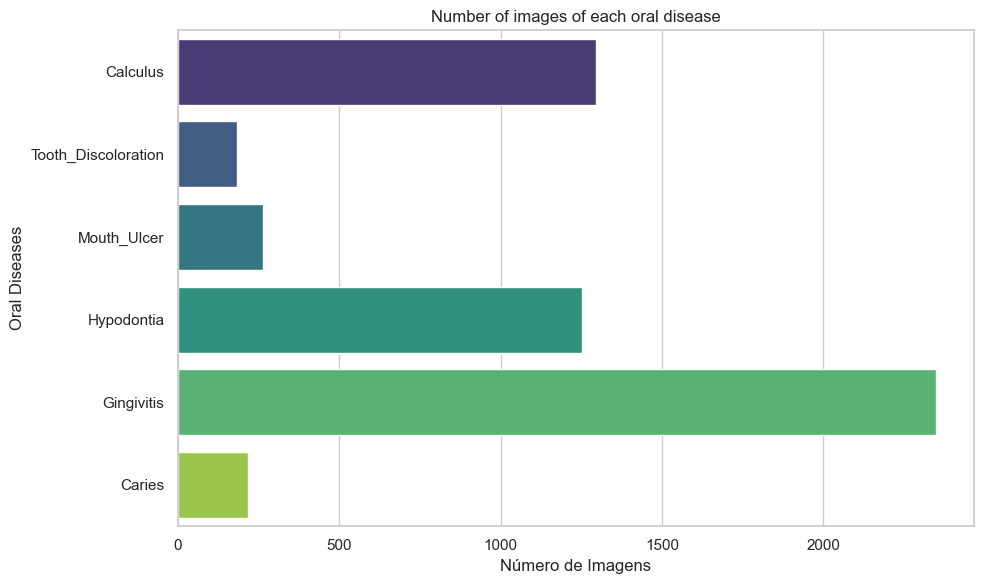

In [4]:
Visualization.criar_barplot(contagem_de_imagens)

Existe um elevado desequilibrio entre as classes, o que irá prejudicar, de forma considerável, o modelo.
Para tal, serão realizados várias abordagens para tentar combater este problema; abaixo é possivel visualizar uma das soluções, sendo essa a *Data Augmentation* que consiste em aplicar transformações (como rotação, Translação, Zoom, reflexão, etc...) às imagens da classe minoritária para criar novas instâncias e assim balancear as classes.

### 2. Solução para o desequilibrio das classes

In [5]:
pastas_para_analisar = [
    image_dir / 'Calculus',
    image_dir / 'Tooth Discoloration' / 'Tooth_Discoloration_Augmented_DataSet',
    image_dir / 'Mouth Ulcer' / 'Mouth_Ulcer_Augmented_DataSet',
    image_dir / 'Hypodontia',
    image_dir / 'Gingivitis',
    image_dir / 'Caries' / 'Caries_Augmented_DataSet',
]

In [6]:
contagem_de_imagens = Visualization.contar_imagens_em_pastas(pastas_para_analisar)
contagem_de_imagens

{'Calculus': 1296,
 'Tooth_Discoloration_Augmented_DataSet': 1834,
 'Mouth_Ulcer_Augmented_DataSet': 2541,
 'Hypodontia': 1251,
 'Gingivitis': 2349,
 'Caries_Augmented_DataSet': 2382}

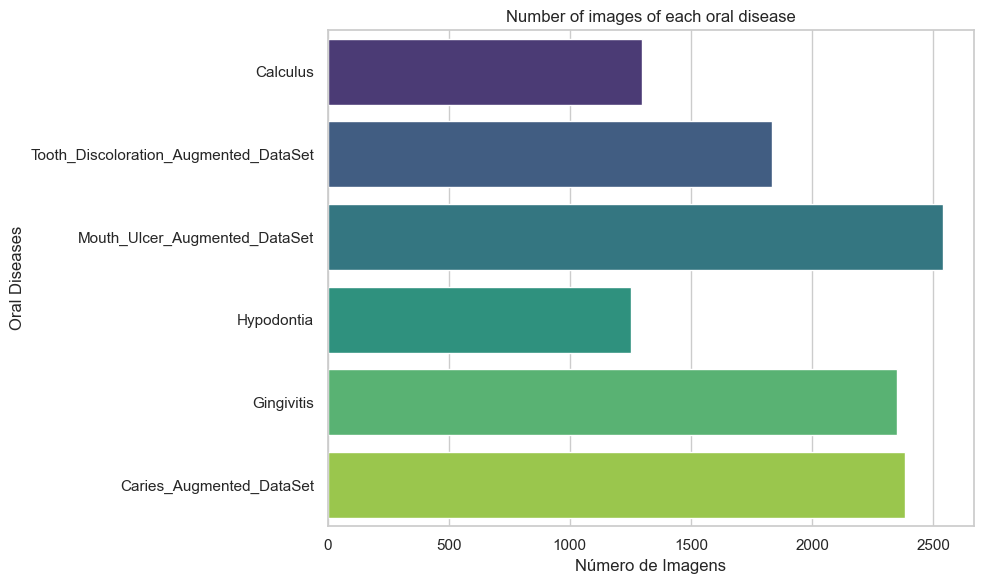

In [7]:
Visualization.criar_barplot(contagem_de_imagens)

Acima, é notório que agora as classes encontram-se mais equilibradas

# Breve visualização de algumas imagens

## 2.1 Divisão em treino, teste e validação

In [8]:
output_dir = base_dir / 'data'
SplitImagesToModel.split_images(pastas_para_analisar, output_dir, seed=42, train_size=0.7, val_size=0.1, test_size=0.2)

A processar a classe: Calculus
Classe 'Calculus' - 907 treino, 129 validação, 260 teste.

A processar a classe: Tooth_Discoloration_Augmented_DataSet
Classe 'Tooth_Discoloration_Augmented_DataSet' - 1283 treino, 183 validação, 368 teste.

A processar a classe: Mouth_Ulcer_Augmented_DataSet
Classe 'Mouth_Ulcer_Augmented_DataSet' - 1778 treino, 254 validação, 509 teste.

A processar a classe: Hypodontia
Classe 'Hypodontia' - 875 treino, 125 validação, 251 teste.

A processar a classe: Gingivitis
Classe 'Gingivitis' - 1644 treino, 234 validação, 471 teste.

A processar a classe: Caries_Augmented_DataSet
Classe 'Caries_Augmented_DataSet' - 1667 treino, 238 validação, 477 teste.

Distribuição concluída.


In [10]:
conjuntos = ["test", "train", "validation"]


NewFolderNames = {
    'Tooth Discoloration': 'Tooth_Discoloration_Augmented_DataSet',
    'Mouth Ulcer': 'Mouth_Ulcer_Augmented_DataSet',
    'Caries' : 'Caries_Augmented_DataSet'
}

for i in conjuntos:
    NewOutput_dir = output_dir / i
    print(f"Alteração no conjunto de {i}\n")
    for keys, values in NewFolderNames.items():
        RenameFolder.rename_folders(NewOutput_dir, values, keys)

Renomeada a pasta 'Tooth_Discoloration_Augmented_DataSet' para 'Tooth Discoloration'.
Renomeada a pasta 'Mouth_Ulcer_Augmented_DataSet' para 'Mouth Ulcer'.
Renomeada a pasta 'Caries_Augmented_DataSet' para 'Caries'.
Renomeada a pasta 'Tooth_Discoloration_Augmented_DataSet' para 'Tooth Discoloration'.
Renomeada a pasta 'Mouth_Ulcer_Augmented_DataSet' para 'Mouth Ulcer'.
Renomeada a pasta 'Caries_Augmented_DataSet' para 'Caries'.
Renomeada a pasta 'Tooth_Discoloration_Augmented_DataSet' para 'Tooth Discoloration'.
Renomeada a pasta 'Mouth_Ulcer_Augmented_DataSet' para 'Mouth Ulcer'.
Renomeada a pasta 'Caries_Augmented_DataSet' para 'Caries'.


## 2.2. Visualização de algumas imagens do DataSet

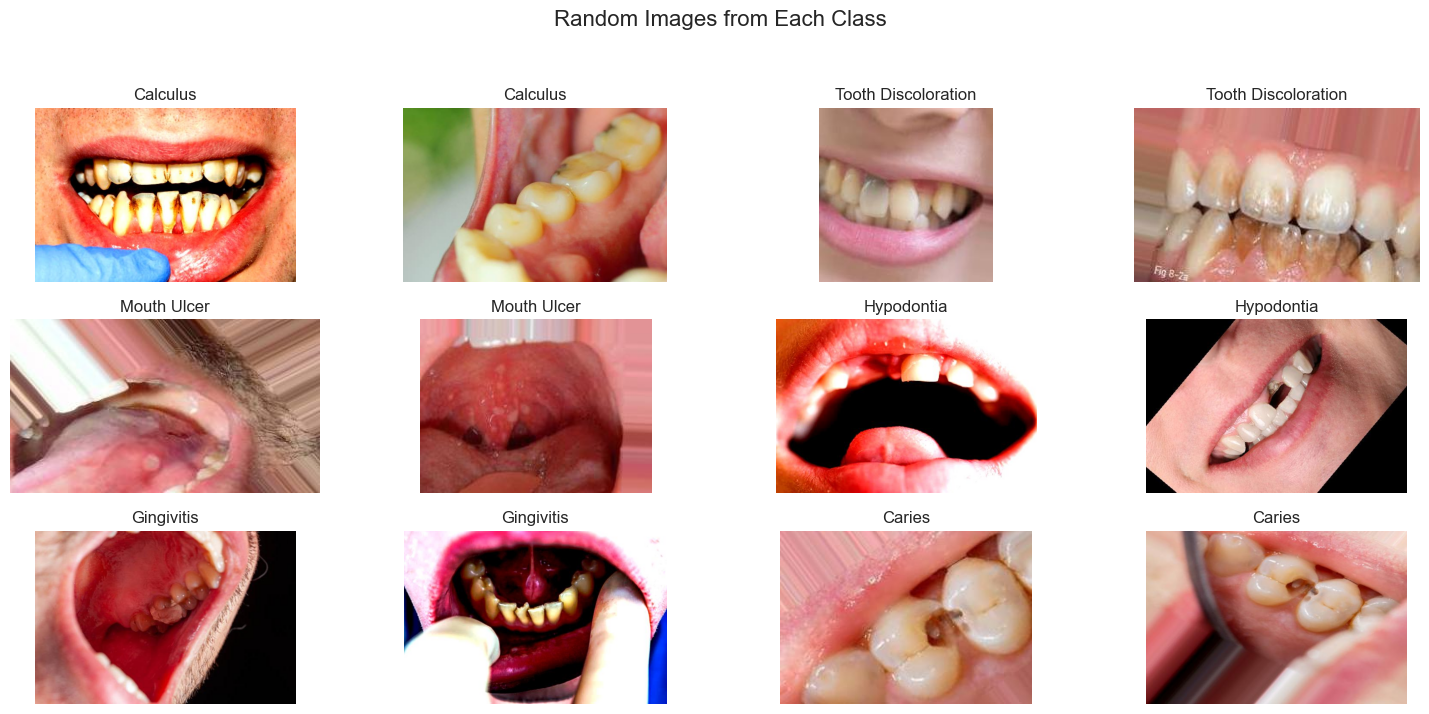

In [13]:
oralDisease = ['Calculus', 'Tooth Discoloration', 'Mouth Ulcer', 'Hypodontia', 'Gingivitis', 'Caries']
Visualization.show_random_images(oralDisease, num_images_per_class=2, num_images_per_row=4, seed=45)